# Decision Tree 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported.")

Libraries Imported.


In [44]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [46]:
df.columns = ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']

In [47]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [48]:
df['charges'].min()

np.float64(1121.8739)

In [49]:
df['charges'].max()

np.float64(63770.42801)

In [50]:
df['charges'].mean()

np.float64(13270.422265141257)

In [51]:
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']

In [52]:
print('Total female person: ',female.shape[0])
print('Total male person: ',male.shape[0])

Total female person:  662
Total male person:  676


In [53]:
df['child'].unique()

array([0, 1, 3, 2, 5, 4])

In [54]:
df['child'].value_counts()

child
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [55]:
print(female['charges'].min())
print(female['charges'].max())
print(female['charges'].mean())

1607.5101
63770.42801
12569.578843835347


In [56]:
print(male['charges'].min())
print(male['charges'].max())
print(male['charges'].mean())

1121.8739
62592.87309
13956.751177721893


In [57]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [58]:
label = list(df['region'].value_counts().keys())
no_of_region = list(df['region'].value_counts().values)

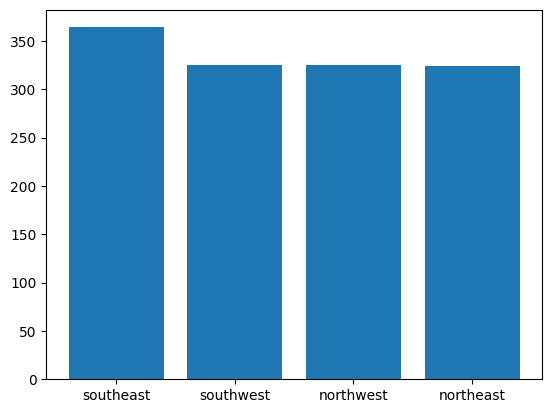

In [59]:
plt.bar(label,no_of_region)
plt.show()

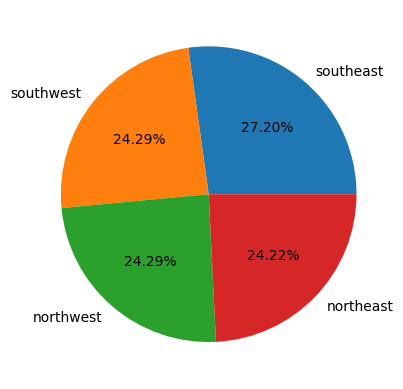

In [60]:
plt.pie(no_of_region,labels=label,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='region', ylabel='count'>

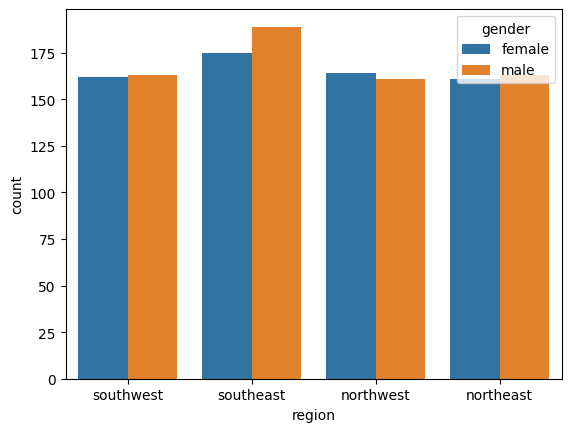

In [61]:
sns.countplot(x='region',data=df,hue='gender')

In [62]:
child_no = list(df['child'].value_counts().keys())
no_of_child = list(df['child'].value_counts().values)

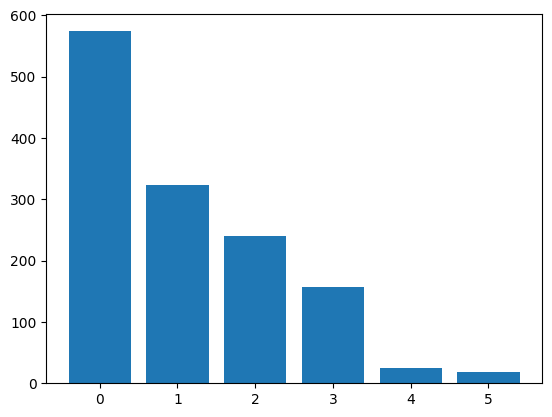

In [63]:
plt.bar(child_no,no_of_child)
plt.show()

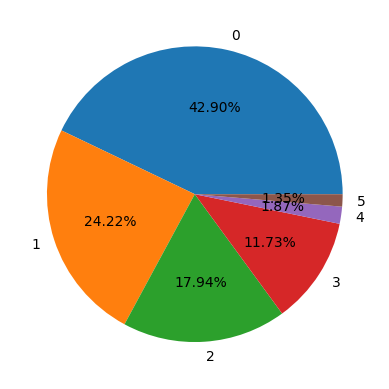

In [64]:
plt.pie(no_of_child,labels=child_no,autopct='%1.2f%%')
plt.show()

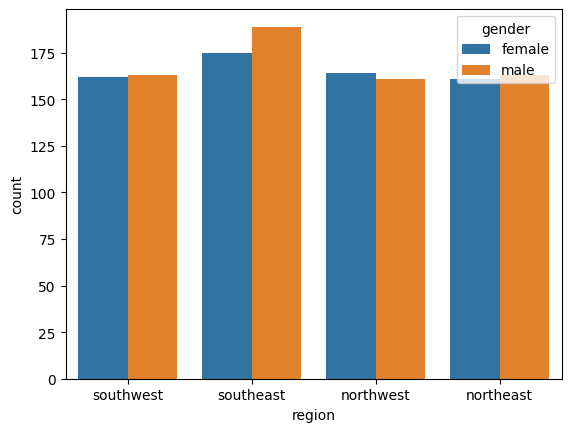

In [65]:
sns.countplot(x='region',data=df,hue='gender')
plt.show()

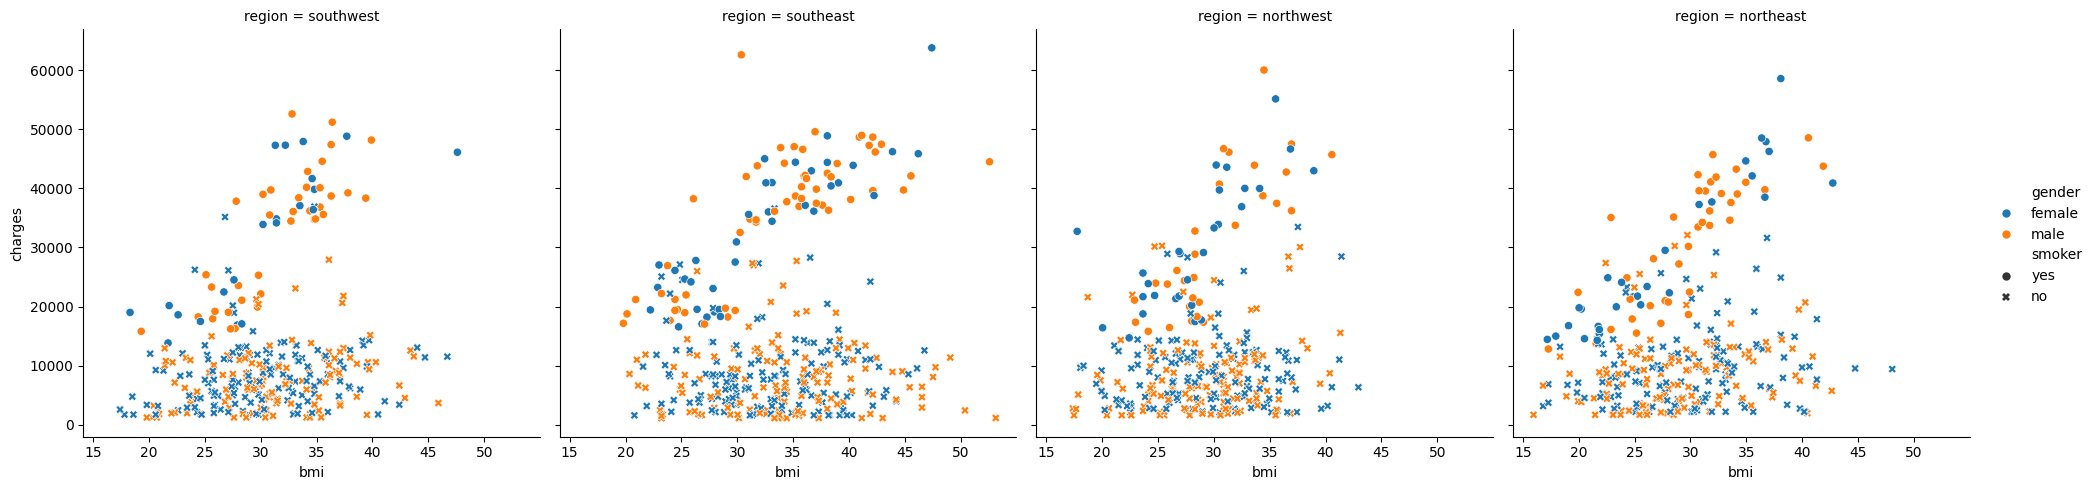

In [66]:
sns.relplot(x='bmi',y='charges',hue='gender',style='smoker',data=df,col='region')
plt.show()

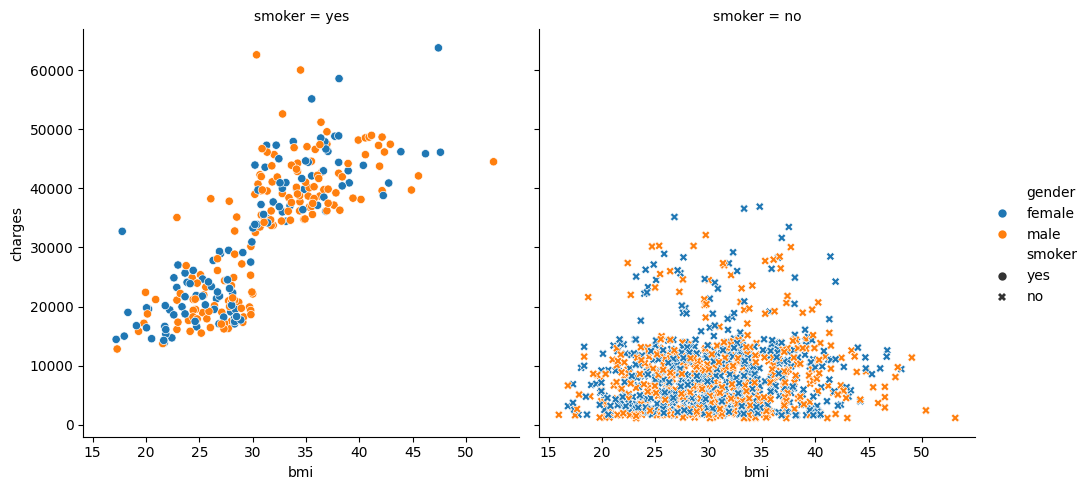

In [67]:
sns.relplot(x='bmi',y='charges',hue='gender',style='smoker',data=df,col='smoker')
plt.show()

In [73]:
child_group = df.groupby('child')
child_record = child_group['charges'].agg(min_price='min',max_price='max',avg_price='mean')
child_record

,min_price,max_price,avg_price
child,,,
0,1121.8739,63770.42801,12365.975602
1,1711.0268,58571.07448,12731.171832
2,2304.0022,49577.66240,15073.563734
3,3443.0640,60021.39897,15355.318367
4,4504.6624,40182.24600,13850.656311
5,4687.7970,19023.26000,8786.035247


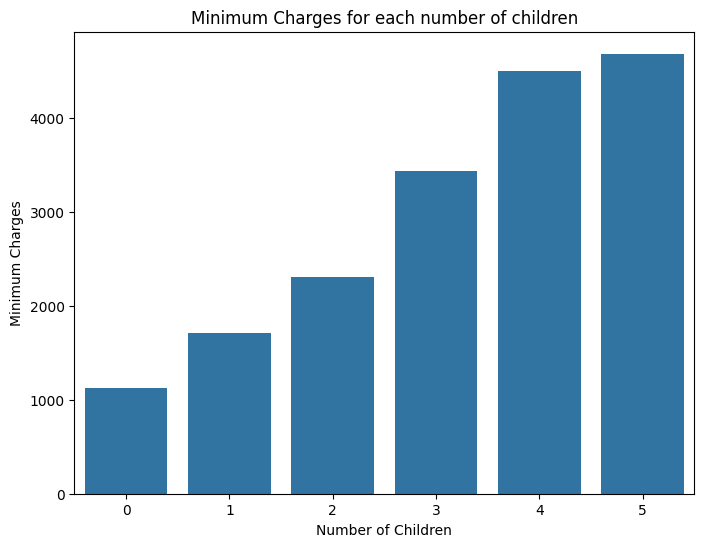

In [75]:
min_charges = df.groupby('child')['charges'].min().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='child',y='charges',data=min_charges)
plt.title('Minimum Charges for each number of children')
plt.xlabel('Number of Children')
plt.ylabel('Minimum Charges')
plt.show()

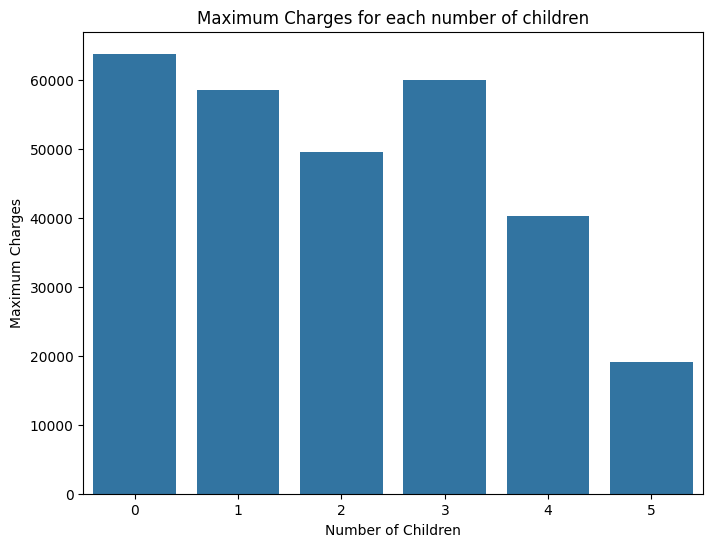

In [31]:
max_charges = df.groupby('child')['charges'].max().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='child',y='charges',data=max_charges)
plt.title('Maximum Charges for each number of children')
plt.xlabel('Number of Children')
plt.ylabel('Maximum Charges')
plt.show()

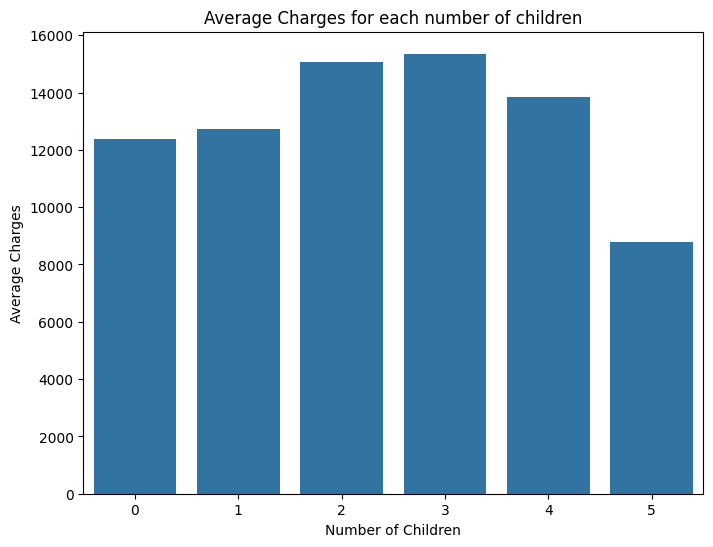

In [32]:
mean_charges = df.groupby('child')['charges'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='child',y='charges',data=mean_charges)
plt.title('Average Charges for each number of children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

In [33]:
df.select_dtypes(include='O')

,gender,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [77]:
df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df2.head()

,age,bmi,child,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [35]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

In [36]:
cat_col = df.select_dtypes(include='O')

In [37]:
obj = OneHotEncoder()
obj.fit_transform(cat_col).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [38]:
# data independents and dependent...
x = df2.drop('charges',axis=1)
y = df2[['charges']]

In [39]:
# training and testing split..
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
# model or algorithm training...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
lnr =LogisticRegression()
dtr = DecisionTreeRegressor()
rdr = RandomForestRegressor(n_estimators=101,min_samples_split=15,min_samples_leaf=5)

# training algorithm...
lnr.fit(x_train,y_train)
print("LinearRegression successfully trained.")

dtr.fit(x_train,y_train)
print("DecisionTreeRegressor successfully trained.")

rdr.fit(x_train,y_train)
print("RandomForestRegressor successfully trained.")

print("LinearRegression Training score: ",lnr.score(x_train,y_train) * 100)
print("LinearRegression Testing score: ",lnr.score(x_test,y_test) * 100)

print()

print("DecisionTreeRegressor Training score: ",dtr.score(x_train,y_train) * 100)
print("DecisionTreeRegressor Testing score: ",dtr.score(x_test,y_test) * 100)

print()

print("RandomForestRegressor Training score: ",rdr.score(x_train,y_train) * 100)
print("RandomForestRegressor Testing score: ",rdr.score(x_test,y_test) * 100)

LinearRegression successfully trained.
DecisionTreeRegressor successfully trained.
RandomForestRegressor successfully trained.
LinearRegression Training score:  31.401869158878505
LinearRegression Testing score:  0.0

DecisionTreeRegressor Training score:  99.93452129203472
DecisionTreeRegressor Testing score:  68.73003667648632

RandomForestRegressor Training score:  90.29195109029627
RandomForestRegressor Testing score:  83.3659051977053


In [44]:
# saving models or algorithms...
import joblib,os
os.makedirs('models',exist_ok=True)

In [45]:
joblib.dump(lnr,"./models/linear_model")
joblib.dump(dtr,"./models/decisiontree_model")
joblib.dump(rdr,"./models/randomforest_model")
print("successfully saved your algorithm at this location : ./models/randomforest_model")

successfully saved your algorithm at this location : ./models/randomforest_model


In [46]:
# prediction

linear_prediction = lnr.predict(x_test)
decisiontree_prediction = dtr.predict(x_test)
randomforest_prediction = rdr.predict(x_test)

In [47]:
compare_df = pd.concat([x_test,y_test],axis='columns')
compare_df['linear_prediction'] = linear_prediction
compare_df['decisiontree_prediction'] = decisiontree_prediction
compare_df['randomforest_prediction'] = randomforest_prediction
compare_df.head(20)

,age,bmi,child,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges,linear_prediction,decisiontree_prediction,randomforest_prediction
122,20,28,0,0,0,1,0,0,2257,2709,2261.0,2281.277468
1151,58,36,0,0,0,1,0,0,12235,13844,11743.0,12796.560562
106,19,28,1,0,0,0,0,1,2331,3410,1842.0,3252.917836
685,53,26,2,1,0,0,0,0,11244,30184,29186.0,15236.246422
981,34,21,0,1,0,0,0,0,4500,10601,3935.0,5430.371806
61,25,33,4,1,0,0,1,0,4504,4915,17128.0,7799.269166
332,61,31,0,0,0,1,0,0,13429,10959,13143.0,14018.226133
157,18,25,0,1,1,0,0,0,15518,1704,17178.0,17598.771789
219,24,23,0,0,0,0,1,0,25081,3392,2464.0,3592.098227
20,60,36,0,0,0,0,0,0,13228,13887,12741.0,14416.311188


In [48]:
os.makedirs('prediction',exist_ok=True)

In [49]:
compare_df.to_csv('./prediction/prediction.csv',index=False)
print("successfuly saved")

successfuly saved


In [50]:
joblib.dump(rdr,"randomforest.lb")

['randomforest.lb']